# DEMO: AutoEncoder mã hoá và tái tạo hình ảnh
Dataset: fashion mnist

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [3]:
# Tải dữ liệu Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Định nghĩa kích thước đầu vào
input_size = 784

# Xây dựng encoder
encoder = keras.Sequential([
    keras.Input(shape=(input_size,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu') # Lớp mã hóa
])

# Xây dựng decoder
decoder = keras.Sequential([
    keras.Input(shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_size, activation='sigmoid') # Lớp giải mã
])

# Kết hợp encoder và decoder để tạo autoencoder
input_img = keras.Input(shape=(input_size,))
encoded_representation = encoder(input_img)
decoded_img = decoder(encoded_representation)
autoencoder = keras.Model(input_img, decoded_img)
# autoencoder = keras.Model(inputs=encoder.input, outputs=decoder(encoder.output))

In [10]:
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
from re import VERBOSE
# Huấn luyện mô hình
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, verbose=1,
                          shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0636 - val_loss: 0.0219
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0207 - val_loss: 0.0182
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0177 - val_loss: 0.0166
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0163 - val_loss: 0.0156
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0145 - val_loss: 0.0142
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


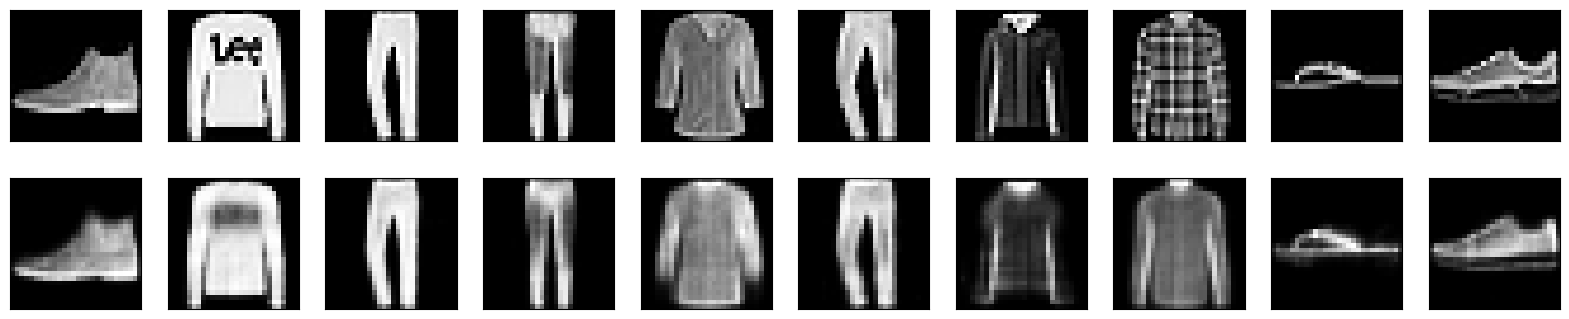

In [15]:
# Mã hóa và giải mã dữ liệu kiểm tra
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Hiển thị kết quả
n = 10  # Số lượng hình ảnh muốn hiển thị
plt.figure(figsize=(20, 4))
for i in range(n):
    # Hiển thị hình ảnh gốc
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Hiển thị hình ảnh được tái tạo
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

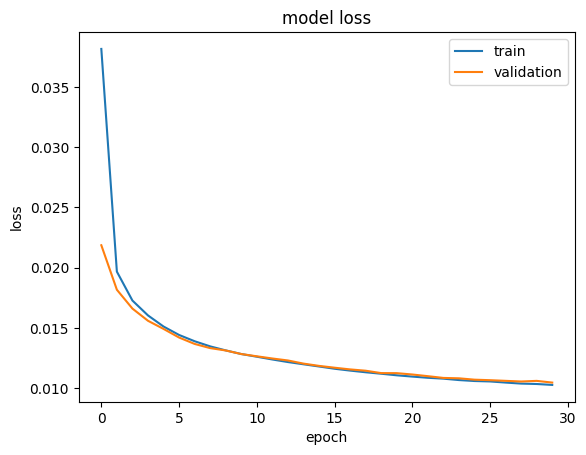

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()